In [1]:
import pandas as pd
from math import sqrt
from scipy.stats import norm, t
import matplotlib.pyplot as plt
from numpy import corrcoef

In [2]:
datafile = "../../dataset/ch18/couples.txt"
data = pd.read_csv(datafile, sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    201 non-null    object 
 1   wAge     199 non-null    object 
 2   hAge     199 non-null    float64
 3   wHeight  199 non-null    float64
 4   hHeight  199 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.0+ KB


In [4]:
data.head()

,Names,wAge,hAge,wHeight,hHeight
0,John and Judy,43,49.0,1590.0,1809.0
1,Carl and Kathryn,28,25.0,1560.0,1841.0
2,Craig and Jackie,30,40.0,1620.0,1659.0
3,Larry and Susan,57,52.0,1540.0,1779.0
4,Scott and Susan,52,58.0,1420.0,1616.0


In [29]:
data = data[data.wAge!='*']

In [31]:
data = data.dropna()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 200
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Names    170 non-null    object 
 1   wAge     170 non-null    object 
 2   hAge     170 non-null    float64
 3   wHeight  170 non-null    float64
 4   hHeight  170 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.0+ KB


In [36]:
husband = data['hAge']

In [38]:
wife = data['wAge'].astype('float64')

(17.8, 66.2, 15.7, 66.3)

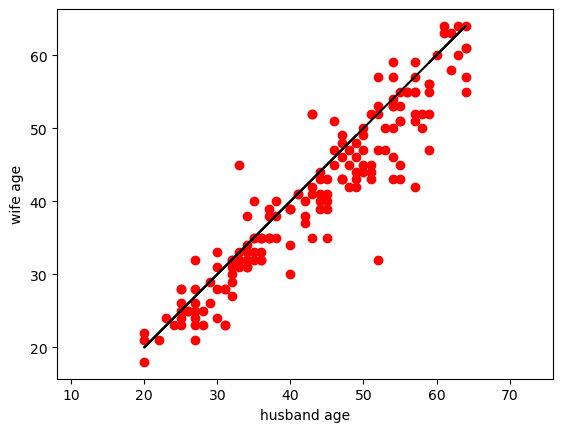

In [41]:
plt.plot(husband, wife, 'ro');
plt.plot(husband, husband, 'k-');
plt.xlabel("husband age");
plt.ylabel("wife age");
plt.axis('equal')

In [42]:
difference = husband - wife

In [50]:
def test():
    d0 = 0
    d = difference.mean()
    df = len(difference)-1
    sd = difference.std(ddof=1)
    se = sd / sqrt(len(difference))
    tscore = (d - d0) / se
    pval = (1-t.cdf(tscore, df)) * 2
    print(f"P-value: {pval:.4e}")

test()

P-value: 2.4737e-11


In [53]:
def CI(alpha):
    d = difference.mean()
    df = len(difference)-1
    sd = difference.std(ddof=1)
    se = sd / sqrt(len(difference))
    crit = t.ppf(1-alpha/2, df)
    me = crit * se
    print(f"{100*(1-alpha)}% CI: ({d-me:.1f}, {d+me:.1f})")

CI(0.05)

95.0% CI: (1.6, 2.9)


In [54]:
avg_age = 0.5 * husband + 0.5 * wife

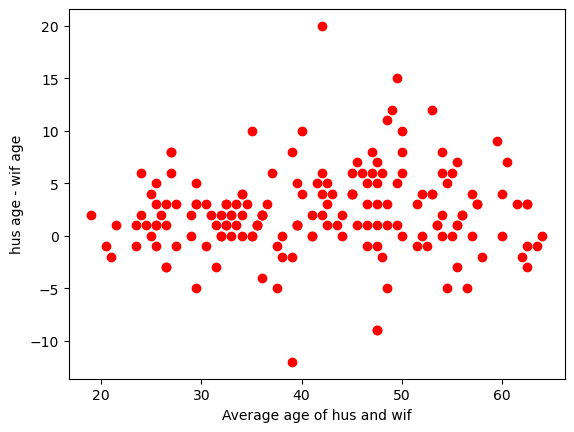

In [58]:
plt.plot(avg_age, difference, 'ro');
plt.xlabel('Average age of hus and wif');
plt.ylabel('hus age - wif age');